In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv", encoding='ISO-8859-1')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# Data Cleaning

In [11]:
df.isnull().sum()
# Drop rows with missing Description 
df = df.dropna(subset=['Description'])

In [13]:
# Fill missing CustomerID
df['CustomerID'] = df['CustomerID'].fillna(0)

# Feature Engineering

In [15]:
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Date Handling

In [19]:
# Convert InvoiceDate to datetime format and extract features
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Exploratory Data Analysis (EDA)

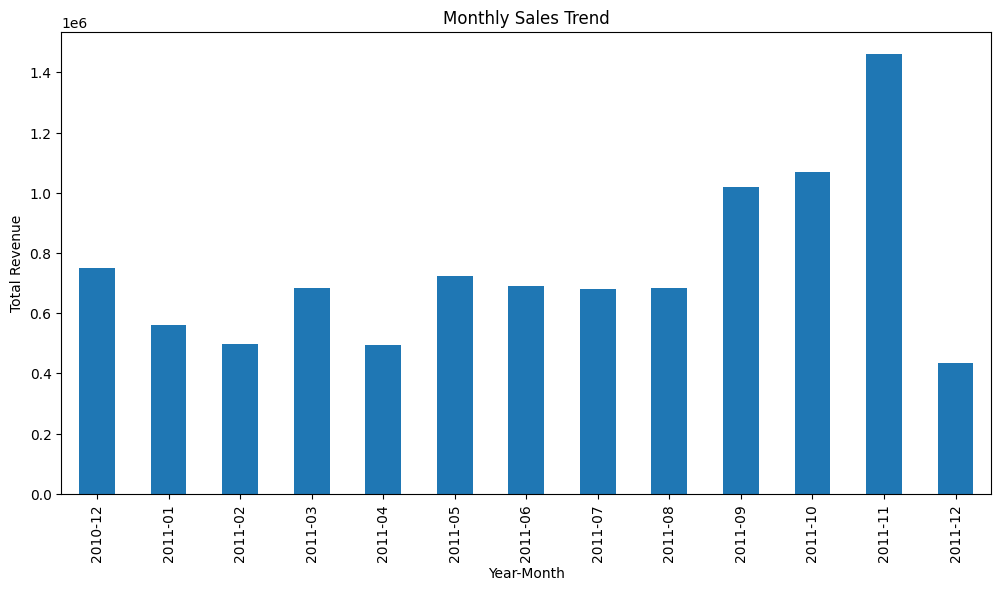

In [17]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('YearMonth')['TotalSales'].sum()
monthly_sales.plot(kind='bar', figsize=(12, 6))
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.show()

<Axes: title={'center': 'Top 10 Countries by Revenue'}, xlabel='Country'>

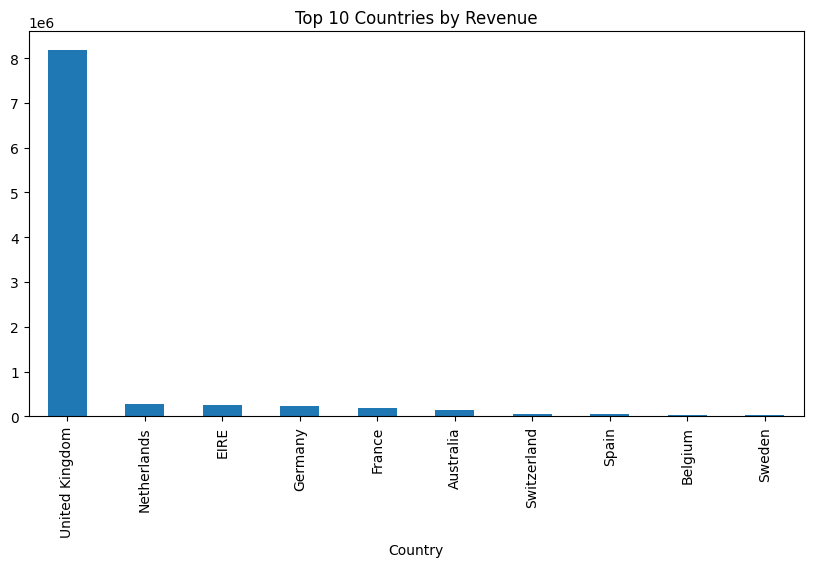

In [23]:
top_countries = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10,5), title="Top 10 Countries by Revenue")

<Axes: title={'center': 'Top 10 Products by Sales'}, ylabel='Description'>

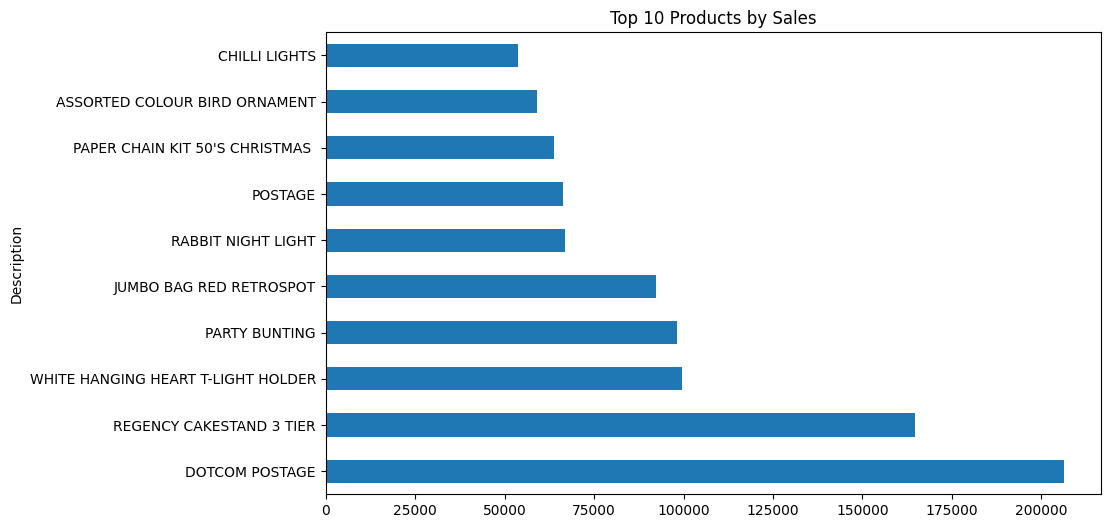

In [21]:
top_products = df.groupby('Description')['TotalSales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(10,6), title="Top 10 Products by Sales")

## Conclusion: Key Findings from E-Commerce Sales Analysis

### Top Countries by Revenue
- The United Kingdom overwhelmingly dominates total revenue, contributing the majority of all sales.  
- Other top countries include the Netherlands, EIRE (Ireland), Germany, and France.  
- These markets show potential for targeted marketing and inventory prioritization.  

### Monthly Sales Trends
- Sales tend to peak in the months leading up to the holiday season, particularly in **November 2011**, which shows the highest revenue overall.  
- The upward trend starting from **September to November** suggests strong seasonal demand during Q4.  
- The lowest month was **December 2011**, likely due to partial data or post-holiday slowdowns.  

### Top Products by Sales
- Items like **“DOTCOM POSTAGE”** and **“REGENCY CAKESTAND 3 TIER”** top the list in total sales.  
- Products with strong seasonal or decorative appeal (e.g., **"WHITE HANGING HEART T-LIGHT HOLDER"**) are also highly ranked.  
- Businesses can use this insight to restock high performers and evaluate pricing strategies.  

---

## Next Steps & Future Improvements
- Implementing sales forecasting using regression models to anticipate demand.  
- Using SQL to analyze customer purchase frequency and regional buying habits.  
- Detecting product returns and anomalies (e.g., negative quantities) to improve order management.  
- Expanding product categorization for more granular analysis.  
- Deploying a dashboard for interactive exploration of trends and KPIs.
